<a href="https://colab.research.google.com/github/Ousoka/ANN_MNIST/blob/master/FB_OK_30_04_2025_MNIST_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Ajoutons du bruit a nos images

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def add_noise(image, noise_factor):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0., 1.)
    return noisy_image

train_images_noisy = add_noise(train_images, 0.5)
test_images_noisy = add_noise(test_images, 0.5)

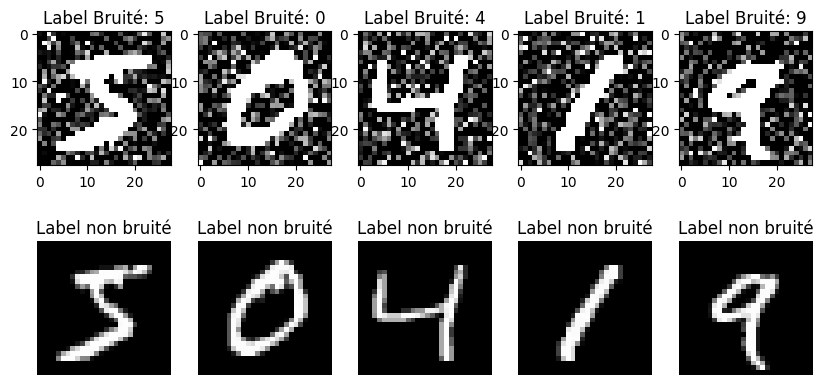

In [ ]:
# Afficher 5 images aleatoires, leurs labels et les resultats avec du noise
sample_images = train_images_noisy[:5]
sample_labels = train_labels[:5]
original_images = train_images[:5]  # Slice the original images to match the sample

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.title(f"Label Bruité: {sample_labels[i]}")
    plt.imshow(sample_images[i], cmap='gray')

    # Display the corresponding original image
    plt.subplot(2, 5, i + 6) # Create a new subplot for the original image below
    plt.title("Label non bruité")
    plt.imshow(original_images[i], cmap='gray')  # Display the original image
    plt.axis('off')

Normalisons les images


In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
train_images.shape

(60000, 28, 28)

Augmentons une dimension a notre train set

In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

Reaffichons le shape

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

Faisons l'encodage puis le decodage de nos images

In [ ]:
input_img= Input(shape=(28,28,1))


Encodeur

In [ ]:
x= Conv2D(64, (3,3), activation='relu', padding='same')(input_img)
x= MaxPooling2D((2,2), padding='same')(x)
x= Conv2D(32, (3,3), activation='relu', padding='same')(x)
x= MaxPooling2D((2,2), padding='same')(x)
encoded= x


Decodeur

In [ ]:
x= Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
x= UpSampling2D((2,2))(x)
x= Conv2D(64, (3,3), activation='relu', padding='same')(x)
x= UpSampling2D((2,2))(x)
decoded= Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

In [ ]:
from tensorflow.keras.models import Model
autoencoder= Model(input_img, decoded)
encoder= Model(input_img, encoded)

# autoencoder.summary()
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,104 (74.62 KB)

 Trainable params: 19,104 (74.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
history= autoencoder.fit(train_images_noisy,
                         train_images,
                         epochs=100,
                         batch_size=128,
                         shuffle=True,
                         validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.2297 - val_loss: 0.0956
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0934 - val_loss: 0.0900
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0884 - val_loss: 0.0872
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0865 - val_loss: 0.0864
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0848 - val_loss: 0.0845
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0838 - val_loss: 0.0839
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0823 - val_loss: 0.0826
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0818 - val_loss: 0.0824
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0813 - val_loss: 0.0828
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0810 - val_loss: 0.0815
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━

Affichons les courbes d'entrainement du loss

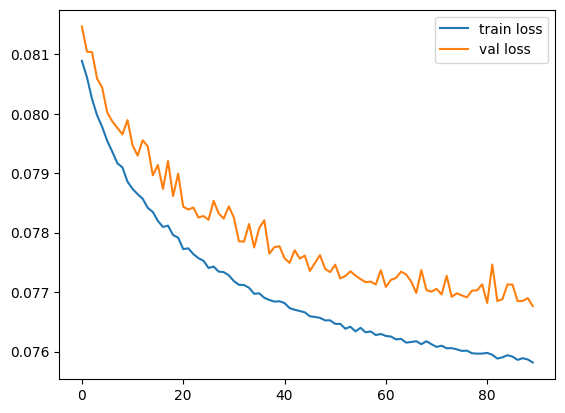

In [ ]:
plt.plot(history.history['loss'][-90:], label='train loss')
plt.plot(history.history['val_loss'][-90:], label='val loss')
plt.legend()
plt.show()

Faisons maintenant nos predictions

In [ ]:
img_enc= encoder.predict(test_images_noisy)
img_dcd= autoencoder.predict(test_images_noisy)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[[1.76829427e-01, 0.00000000e+00, 2.63969421e-01, ...,
         1.64067596e-01, 0.00000000e+00, 0.00000000e+00],
        [2.02761322e-01, 0.00000000e+00, 2.80319512e-01, ...,
         1.67211995e-01, 0.00000000e+00, 0.00000000e+00],
        [2.51395822e-01, 3.34701464e-02, 2.79010296e-01, ...,
         2.27723613e-01, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.97826043e-01, 0.00000000e+00, 2.75678158e-01, ...,
         1.89131096e-01, 0.00000000e+00, 0.00000000e+00],
        [2.08001465e-01, 0.00000000e+00, 2.89974451e-01, ...,
         2.09303260e-01, 0.00000000e+00, 0.00000000e+00],
        [2.28198752e-01, 0.00000000e+00, 2.73352981e-01, ...,
         2.16302693e-01, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 2.55526364e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.73015851e-02, 2.10081875e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.73933357e-02, 

(np.float64(-0.5), np.float64(31.5), np.float64(6.5), np.float64(-0.5))

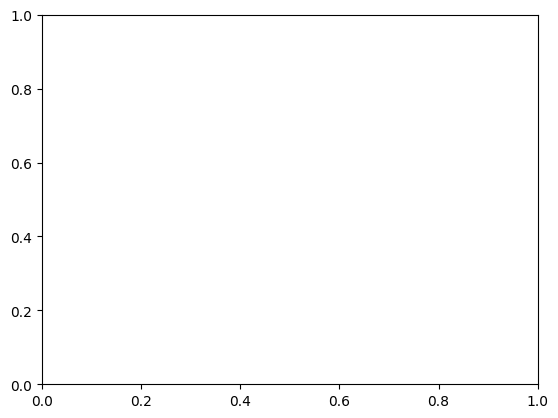

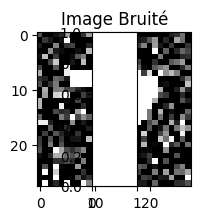

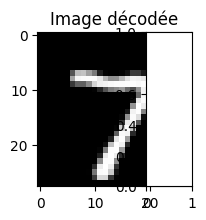

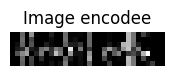

In [ ]:
plt.subplot(1,1,1)
plt.figure(figsize=(2,2))
plt.imshow(test_images_noisy[0].reshape(28,28), cmap='gray')
plt.title("Image Bruité")
# plt.show()

plt.subplot(1,3,2)

plt.figure(figsize=(2,2))
plt.imshow(img_dcd[0].reshape(28,28), cmap='gray')
plt.title("Image décodée")
# plt.show()

plt.subplot(1,3,3)

plt.figure(figsize=(2,2))
plt.imshow(img_enc[0][i], cmap='gray')
plt.title("Image encodee")
plt.axis('off')
# plt.show()

En utilisant le PCA avec une projection 2D de l'espace latent coloré par chiffre

In [1]:
# En utilisant le PCA avec une projection 2D de l'espace latent coloré par chiffre, affichons la figure
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
encoded_images_2d = pca.fit_transform(img_enc.reshape(img_enc.shape[0], -1))
plt.figure(figsize=(10, 10))
plt.scatter(encoded_images_2d[:, 0], encoded_images_2d[:, 1], c=test_labels, cmap='viridis')
plt.colorbar()


NameError: name 'img_enc' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten # Import Flatten layer

model_noisy = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 784-dimensional vector
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'), # Output layer with 10 units (for 10 classes) and softmax activation
])

# Compile the model
model_noisy.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Use categorical_crossentropy loss for multi-class classification

# Train the model
history = model_noisy.fit(train_images_noisy, train_labels_cat, epochs=10, validation_split=0.1, batch_size=32, verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7459 - loss: 0.7829 - val_accuracy: 0.9152 - val_loss: 0.2970
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9049 - loss: 0.2973 - val_accuracy: 0.9213 - val_loss: 0.2573
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9342 - loss: 0.2025 - val_accuracy: 0.9347 - val_loss: 0.2172
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9515 - loss: 0.1477 - val_accuracy: 0.9383 - val_loss: 0.2041
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9643 - loss: 0.1049 - val_accuracy: 0.9348 - val_loss: 0.2187
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9734 - loss: 0.0774 - val_accuracy: 0.9368 - val_loss: 0.2278
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9779 - loss: 0.0607 - val_accuracy: 0.9363 - val_loss: 0.2654
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9811 - loss: 0

In [ ]:
# Calculer l'accuracy exact avec le bruit
test_loss, test_acc = model_noisy.evaluate(test_images_noisy, to_categorical(test_labels))
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9209 - loss: 0.3466
Test accuracy: 0.932699978351593


In [ ]:
sample_images_noisy = test_images_noisy[:100]
sample_labels_noisy = test_labels[:100]
predictions_noisy = model_noisy.predict(sample_images_noisy)
predictions_noisy = np.argmax(predictions_noisy, axis=1)




1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


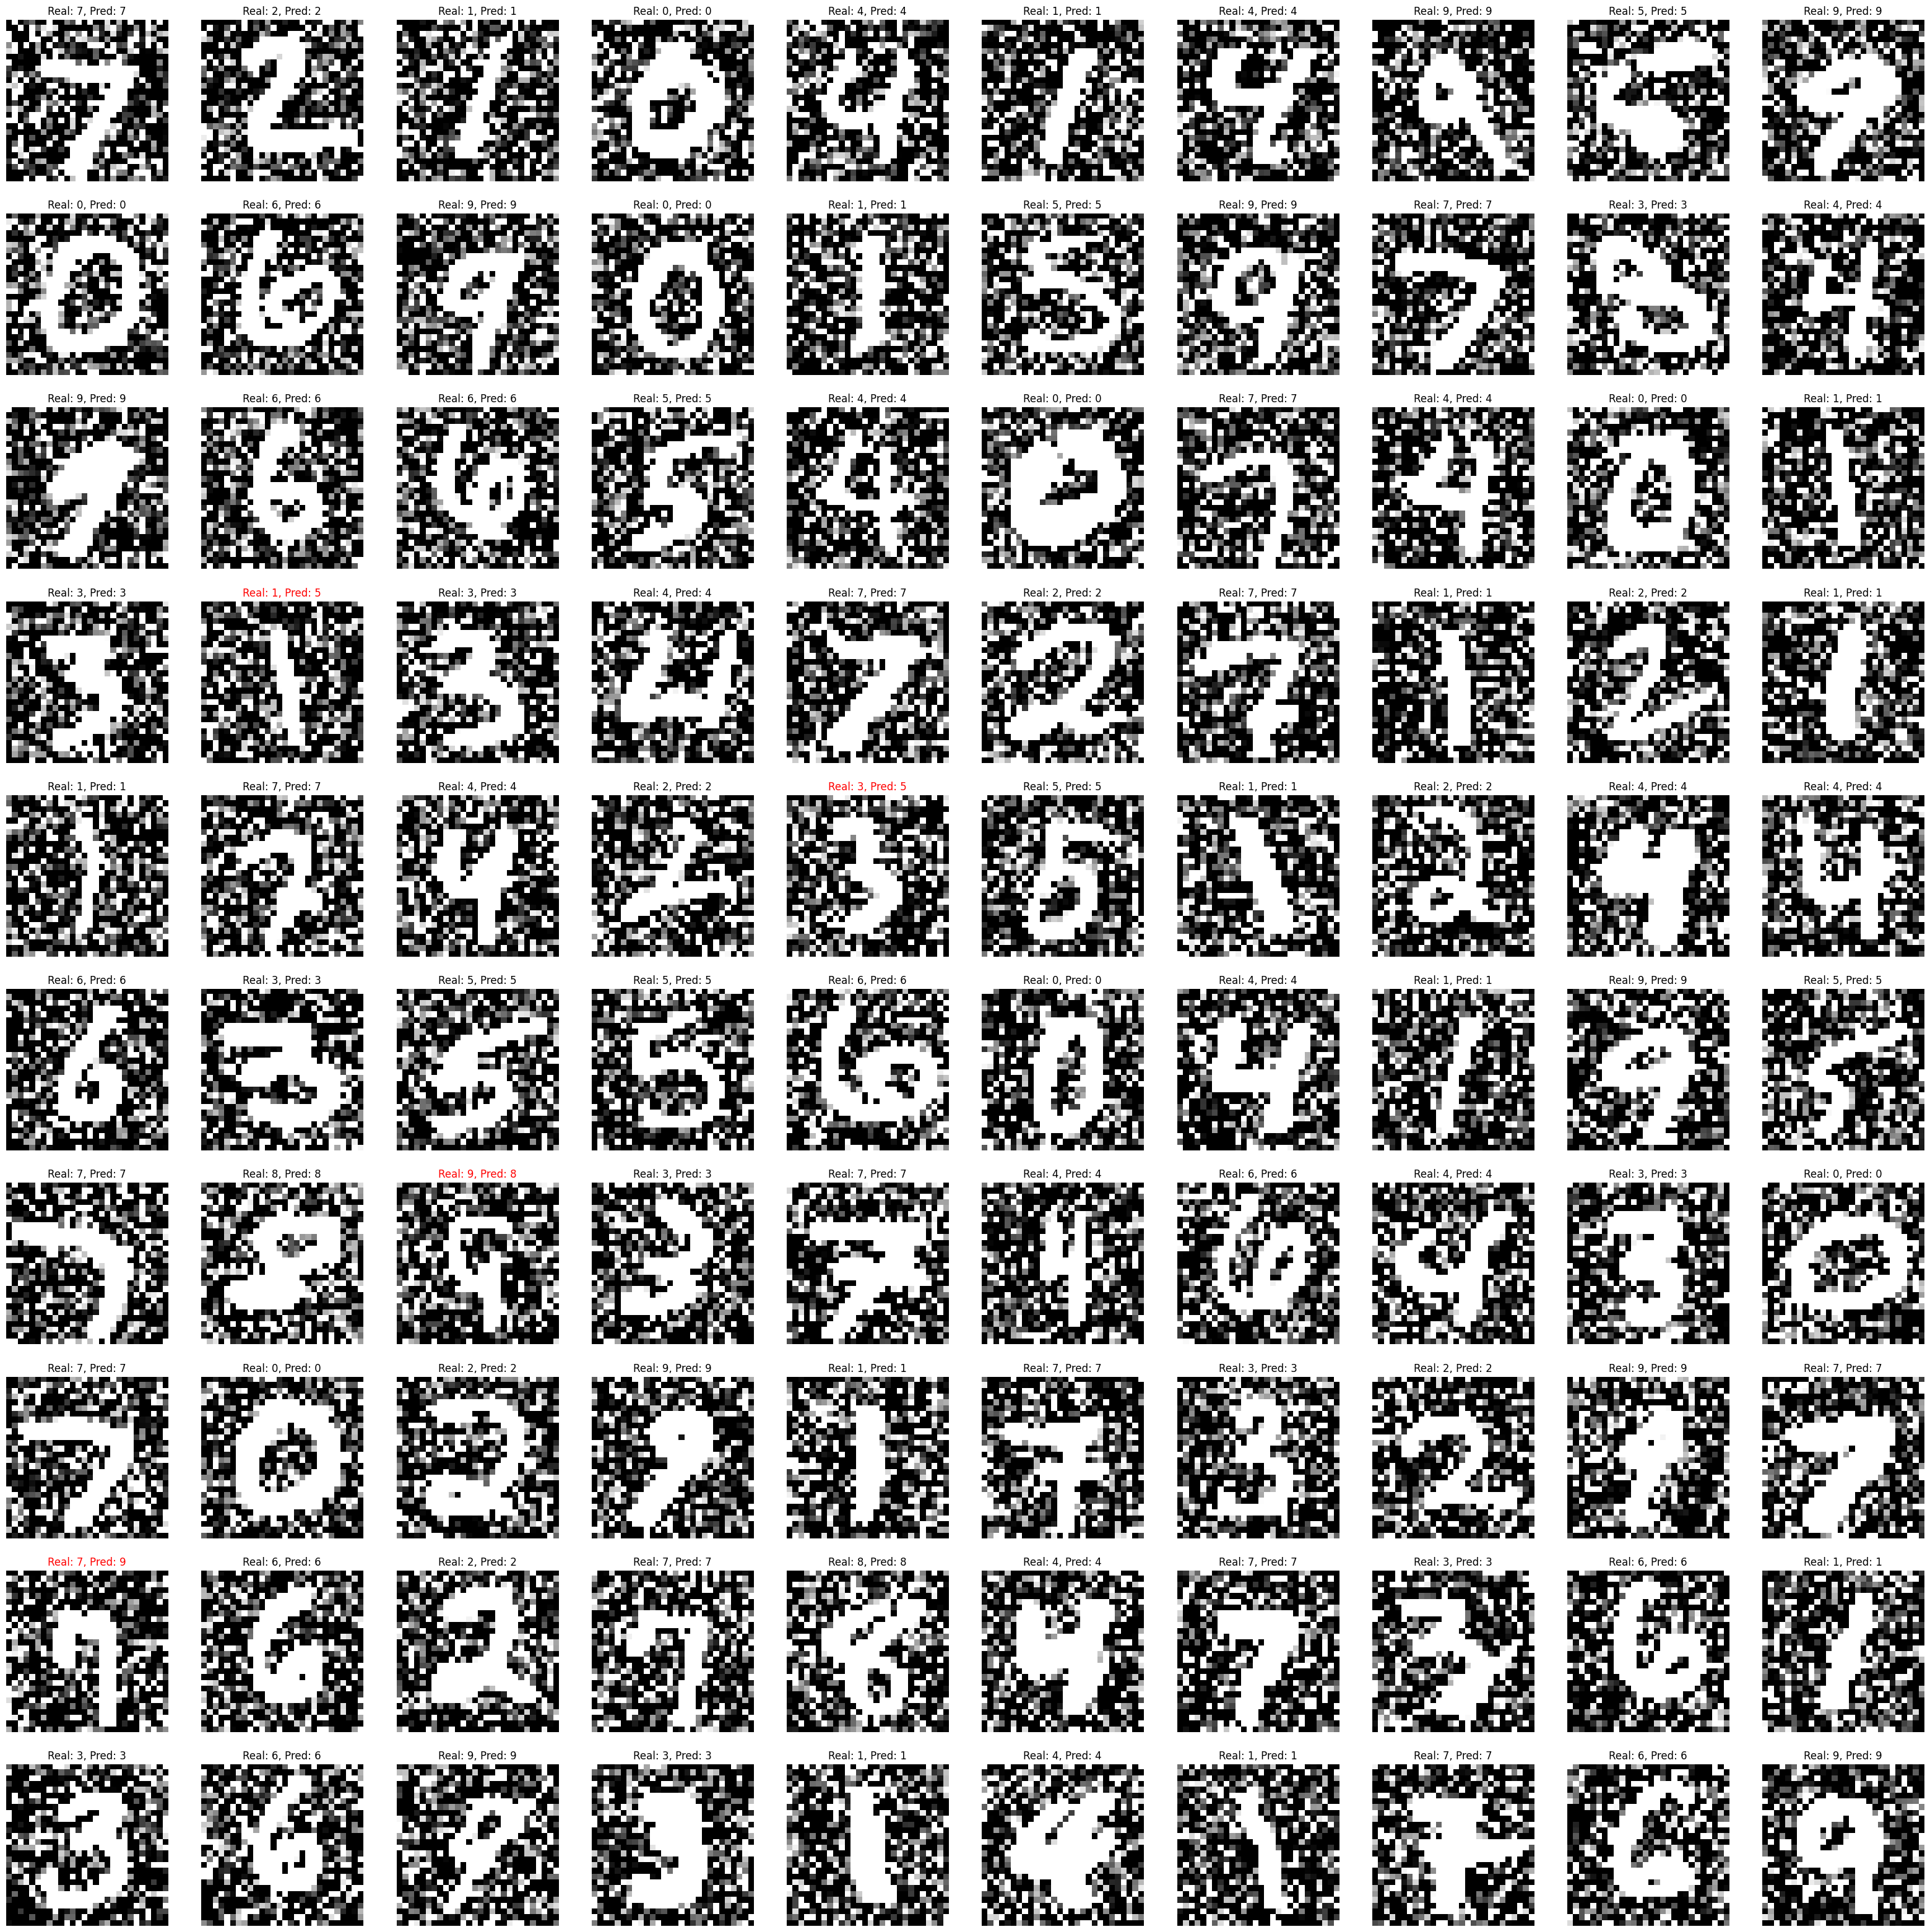

In [ ]:
plt.figure(figsize=(40,40))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    if predictions_noisy[i] != sample_labels_noisy[i]:
        plt.title(f"Real: {sample_labels_noisy[i]}, Pred: {predictions_noisy[i]}", color='red')
    else:
      plt.title(f"Real: {sample_labels_noisy[i]}, Pred: {predictions_noisy[i]}")
    plt.imshow(sample_images_noisy[i], cmap='gray')
    plt.axis('off')


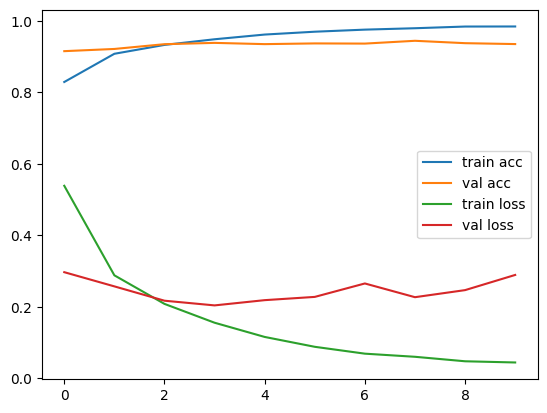

In [ ]:
# Tracer la courbe de l'accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
